In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
T1 = ['2005_4b_cpad', '2009_8b_cpad', '2012_3m_cpad']
T2 = ['2007_4b_cpad', '2011_8b_cpad', '2013_2m_cpad']
T3 = ['2008_4b_cpad', '2014_2m_cpad']
T4 = ['2009_4b_cpad', '2013_8b_cpad', '2015_2m_cpad']
T5 = ['2010_4b_cpad', '2014_8b_cpad', '2016_2m_cpad']
T6 = ['2011_4b_cpad', '2013_6b_cpad', '2015_8b_cpad', '2017_2m_cpad']
T7 = ['2012_4b_cpad', '2014_6b_cpad', '2018_2m_cpad']
T8 = ['2013_4b_cpad', '2015_6b_cpad', '2017_8b_cpad']
T9 = ['2012_2b_cpad', '2014_4b_cpad', '2016_6b_cpad']
T10 = ['2013_2b_cpad', '2015_4b_cpad', '2019_8b_cpad']
T11 = ['2014_2b_cpad', '2016_4b_cpad', '2018_6b_cpad']

curso_policy = {5:9, 6:8, 7:7,8:6,9:5,10:4,11:3}

cohort_1b = [2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]

In [4]:
# cargar bbdd final
pe_full = pd.read_csv(r'C:\Users\JoaquinFarina\OneDrive - Teachers College, Columbia University\Desktop\EMELAB\SIMCE\pe_mixed_with_mrun_19T_con_4b_baseline_1B_baseline_fill_tres_casos_edad_simce_ive.csv',low_memory=False)
pe_full.loc[:,'parental_exp_college_or_more'] = (pe_full.parental_exp>4).astype(int)
# Student 
se_full = pd.read_csv(r'C:\Users\JoaquinFarina\OneDrive - Teachers College, Columbia University\Desktop\EMELAB\SIMCE\20220514_panel_10T_con_exp_estudiantes.csv')

In [5]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

## General figure

In [6]:
for a in range(2002,2020):
    print(a,'\n', pe_full[pe_full.agno==a].parental_exp.value_counts(dropna=False).sort_index(),'\n')

2002 
 parental_exp
1.0    15612
2.0    75090
3.0    12685
4.0    29416
5.0    98850
6.0     9624
NaN    40900
Name: count, dtype: int64 

2003 
 parental_exp
3.0     41776
4.0     66873
5.0    102035
NaN     40529
Name: count, dtype: int64 

2004 
 parental_exp
1.0      5138
3.0     57274
4.0     70921
5.0    116000
NaN     43646
Name: count, dtype: int64 

2005 
 parental_exp
1.0    11887
2.0    55888
3.0    10643
4.0    28911
5.0    96307
6.0    20471
NaN    35727
Name: count, dtype: int64 

2006 
 parental_exp
1.0     13115
2.0     90691
3.0     24266
4.0     63100
5.0    175341
6.0     41242
NaN    117607
Name: count, dtype: int64 

2007 
 parental_exp
1.0     11827
2.0     90012
3.0     17983
4.0     51422
5.0    145773
6.0     37881
NaN    169175
Name: count, dtype: int64 

2008 
 parental_exp
1.0      8455
2.0     82400
3.0     20411
4.0     62443
5.0    176915
6.0     45664
NaN    113930
Name: count, dtype: int64 

2009 
 parental_exp
1.0      8414
2.0     51832
3.0     10513


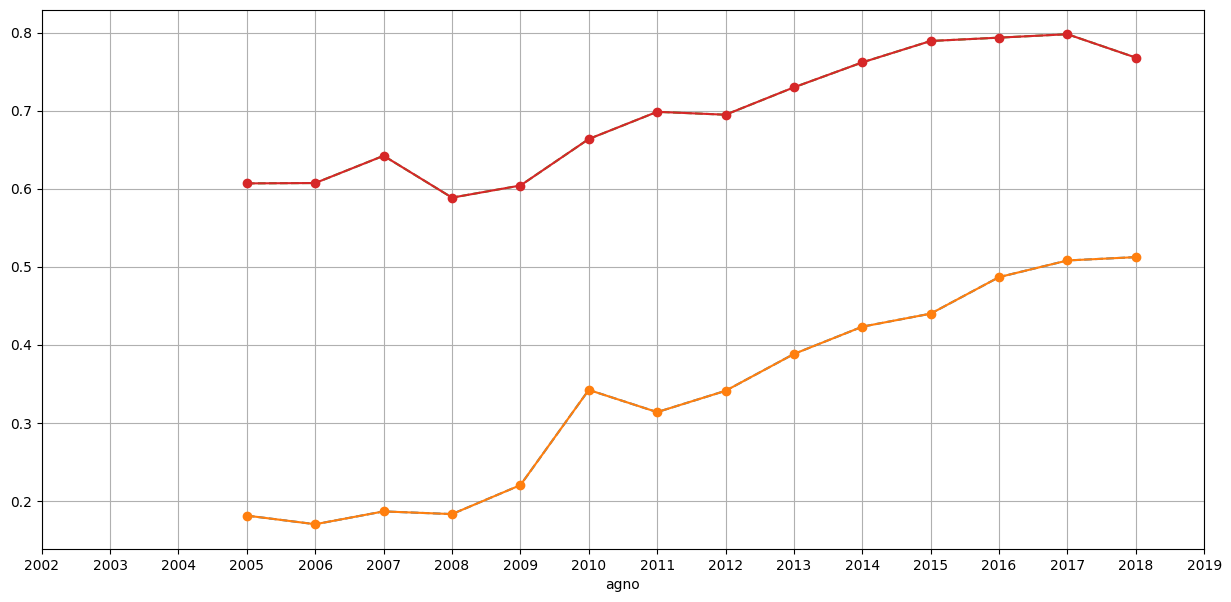

In [7]:
df_4b = pe_full[(pe_full.curso_numeric==4)&
                (pe_full.Income_quintiles_4b_2345.isin([1.5]))& 
                (pe_full.GPA_percentil.isin([1,2,3,4,5]))&
                (pe_full.gen_alu==1)].dropna(subset=['parental_exp_college_or_more'])
df = pd.crosstab(df_4b.parental_exp_college_or_more,df_4b.agno, normalize='columns')
fig, ax = plt.subplots( figsize=(15,7))
df.loc[1].plot(linestyle='--')
df.loc[1].plot(marker = 'o')

df_4b = pe_full[(pe_full.curso_numeric==4)&
                (pe_full.Income_quintiles_4b_2345.isin([4]))& 
                (pe_full.GPA_percentil.isin([1,2,3,4,5]))&
                (pe_full.gen_alu==1)].dropna(subset=['parental_exp_college_or_more'])
df = pd.crosstab(df_4b.parental_exp_college_or_more,df_4b.agno, normalize='columns')
#fig, ax = plt.subplots( figsize=(15,7))
df.loc[1].plot(linestyle='--')
df.loc[1].plot(marker = 'o')

plt.xticks(range(2002,2020))
plt.grid(True)
plt.show()

# DiD descriptivo

4.0
8.0
10.0
4.0
6.0
8.0
10.0
4.0
6.0
10.0
4.0
6.0
8.0
2.0
4.0
6.0
2.0
4.0
8.0
2.0
4.0
6.0


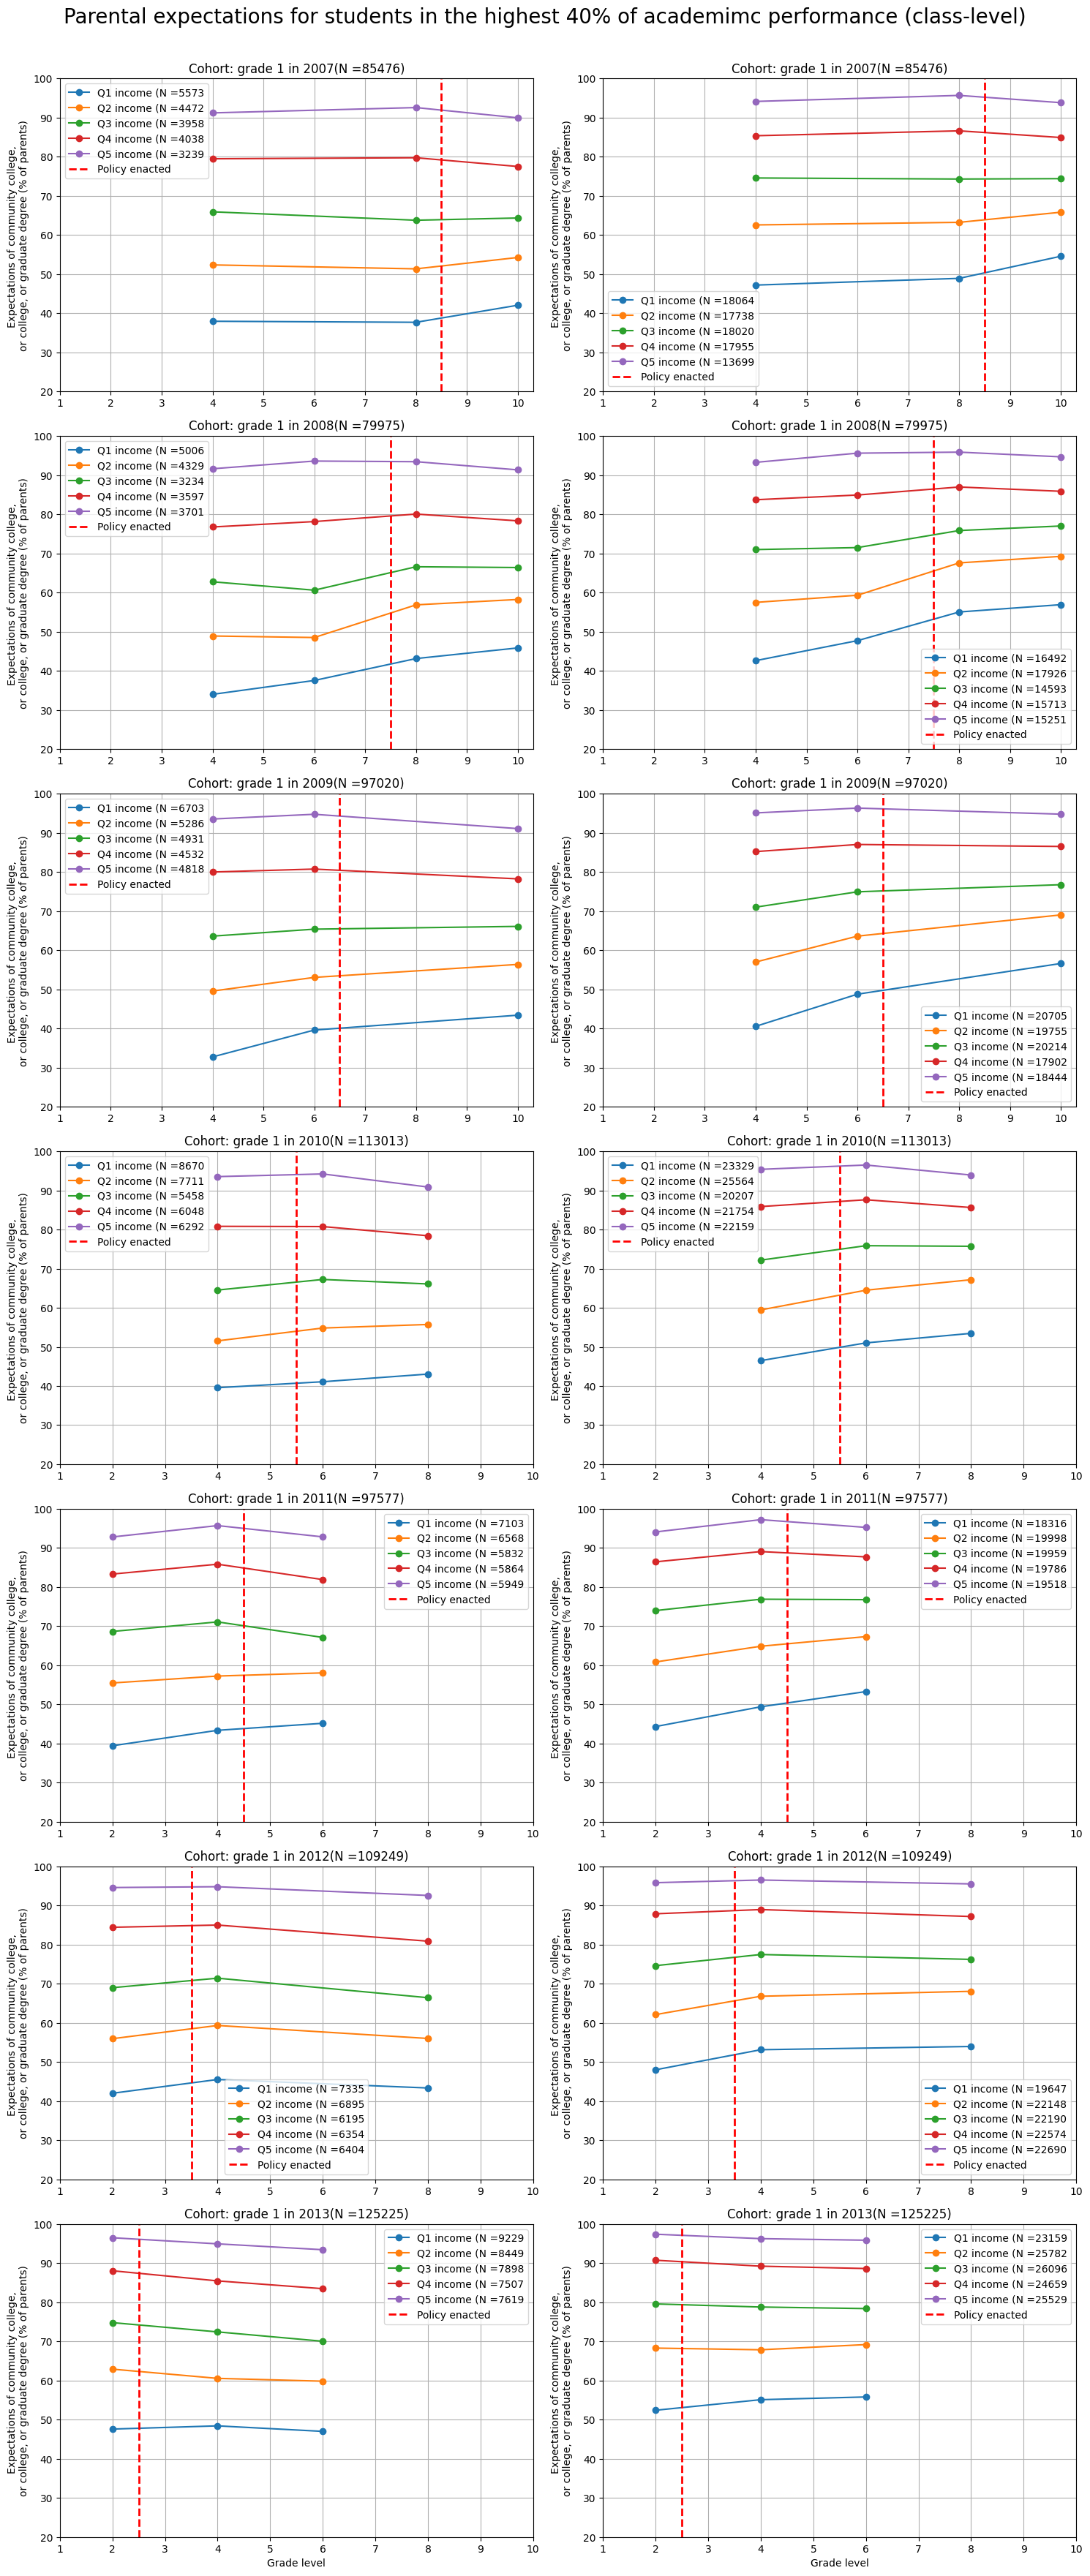

In [8]:
gpa_dict = {12:[1,2], 45:[1,2,3,4,5]}

fig, ax = plt.subplots(nrows = 7,ncols=2, figsize=(15,35))
    
i = 0
for t in [5,6,7,8,9,10, 11]:
    pe_t = pe_full[(pe_full.n_cohorte == t)].dropna(subset=['agno','SES_quintiles', 'GPA_quintil',
                                                            'parental_exp_college_or_more'])
    
    freq = pe_t.mrun.value_counts()
    n_max = freq.values.max()
    items = freq[freq==n_max].index # items that appear more than once
    pe_t = pe_t[pe_t['mrun'].isin(items)]

    cursos = pe_t.curso_numeric.unique()
    cursos.sort()
    
    list_tot = []    
    for c in cursos:
        print(c)
        df_c = pe_t[pe_t.curso_numeric == c]
        
        for gpa in [12,45]:
            q1 = 100*np.round(df_c[(df_c.SES_quintiles == 1) & (df_c.GPA_quintil.isin(gpa_dict[gpa]))].parental_exp_college_or_more.mean(),4)
            q2 = 100*np.round(df_c[(df_c.SES_quintiles == 2) & (df_c.GPA_quintil.isin(gpa_dict[gpa]))].parental_exp_college_or_more.mean(),4)
            q3 = 100*np.round(df_c[(df_c.SES_quintiles == 3) & (df_c.GPA_quintil.isin(gpa_dict[gpa]))].parental_exp_college_or_more.mean(),4)
            q4 = 100*np.round(df_c[(df_c.SES_quintiles == 4) & (df_c.GPA_quintil.isin(gpa_dict[gpa]))].parental_exp_college_or_more.mean(),4)
            q5 = 100*np.round(df_c[(df_c.SES_quintiles == 5) & (df_c.GPA_quintil.isin(gpa_dict[gpa]))].parental_exp_college_or_more.mean(),4)

            list_tot += [[gpa, c,q1, q2,q3,q4,q5]]
            
    df_tot = pd.DataFrame(list_tot, columns = ['case','curso','q1_exp', 'q2_exp','q3_exp', 'q4_exp', 'q5_exp'])
    
    j=0
    for gpa in [12,45]:

        ax[i,j].plot(df_tot[df_tot.case == gpa].curso, df_tot[df_tot.case == gpa].q1_exp, 'o-', label='Q1 income (N =' + str(len(df_c[(df_c.SES_quintiles == 1) & (df_c.GPA_quintil_4b.isin(gpa_dict[gpa]))].mrun.unique())))
        ax[i,j].plot(df_tot[df_tot.case == gpa].curso, df_tot[df_tot.case == gpa].q2_exp, 'o-', label='Q2 income (N =' + str(len(df_c[(df_c.SES_quintiles == 2) & (df_c.GPA_quintil_4b.isin(gpa_dict[gpa]))].mrun.unique())))
        ax[i,j].plot(df_tot[df_tot.case == gpa].curso, df_tot[df_tot.case == gpa].q3_exp, 'o-', label='Q3 income (N =' + str(len(df_c[(df_c.SES_quintiles == 3) & (df_c.GPA_quintil_4b.isin(gpa_dict[gpa]))].mrun.unique())))
        ax[i,j].plot(df_tot[df_tot.case == gpa].curso, df_tot[df_tot.case == gpa].q4_exp, 'o-', label='Q4 income (N =' + str(len(df_c[(df_c.SES_quintiles == 4) & (df_c.GPA_quintil_4b.isin(gpa_dict[gpa]))].mrun.unique())))
        ax[i,j].plot(df_tot[df_tot.case == gpa].curso, df_tot[df_tot.case == gpa].q5_exp, 'o-', label='Q5 income (N =' + str(len(df_c[(df_c.SES_quintiles == 5) & (df_c.GPA_quintil_4b.isin(gpa_dict[gpa]))].mrun.unique())))
        ax[i,j].axvline(curso_policy[t]-0.5,ls='--', lw=2, color = 'r', label = 'Policy enacted')
        ax[i,j].set_xticks([1,2,3,4,5,6,7,8,9,10])
        ax[i,j].set_ylim([20,100])
        #if j==1:
        ax[i,j].set_title('Cohort: grade 1 in '+ str(cohort_1b[t-1]) + '(N =' + str(len(pe_t.mrun.unique())) + ')')
        #else:
        
        ax[i,j].set_ylabel('Expectations of community college, \nor college, or graduate degree (% of parents)')
            
        if i == 6:
            ax[i,j].set_xlabel('Grade level')
            
        ax[i,j].legend()
        ax[i,j].grid(True)
        j+=1
    i+=1

suptitle = plt.suptitle('Parental expectations for students in the highest 40% of academimc performance (class-level)',
                        y=1.005, fontsize=20)
plt.tight_layout()
# When you save the fig, add the suptitle text object as an extra artist
plt.savefig("DiD_descriptive_free_college_effect_on_parental_expectations.png",
            bbox_extra_artists=(suptitle,), bbox_inches="tight")

plt.show()
    
    

    

# Selección: cohorte 5

## Sin agrupar

4.0
8.0
10.0


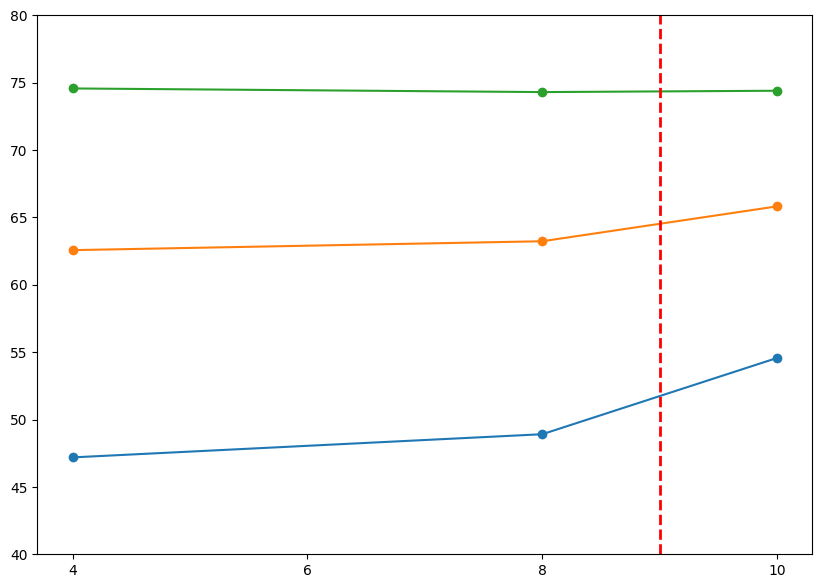

In [9]:
pe_5 = pe_full[(pe_full.n_cohorte == 5)].dropna(subset=['agno','SES_quintiles', 'GPA_quintil',
                                                            'parental_exp_college_or_more'])    
freq = pe_5.mrun.value_counts()
n_max = freq.values.max()
items = freq[freq==n_max].index # items that appear more than once
pe_5 = pe_5[pe_5['mrun'].isin(items)]


fig, ax = plt.subplots( figsize=(10, 7))
x = [4,8,10]

cursos = pe_5.curso_numeric.unique()
cursos.sort()

list_tot = []    
for c in cursos:
    print(c)
    df_c = pe_5[pe_5.curso_numeric == c]
    
    for nse in [1,2,3,4,5]:
        q = 100*np.round(df_c[(df_c.SES_quintiles == nse)].parental_exp_college_or_more.mean(),4)
      
        list_tot += [[nse, c,q]]
        
df_tot = pd.DataFrame(list_tot, columns = ['case','curso','parental_exp'])

ax.plot(x, df_tot[df_tot.case == 1].parental_exp, 'o-', label='Q1 income (N =' + str(len(df_c[(df_c.SES_quintiles == 1)].mrun.unique())))
ax.plot(x, df_tot[df_tot.case == 2].parental_exp, 'o-', label='Q2 income (N =' + str(len(df_c[(df_c.SES_quintiles == 2)].mrun.unique())))
ax.plot(x, df_tot[df_tot.case == 3].parental_exp, 'o-', label='Q3 income (N =' + str(len(df_c[(df_c.SES_quintiles == 3)].mrun.unique())))
#ax.plot(x, df_tot[df_tot.case == 4].parental_exp, 'o-', label='Q4 income (N =' + str(len(df_c[(df_c.SES_quintiles == 4)].mrun.unique())))
#ax.plot(x, df_tot[df_tot.case == 5].parental_exp, 'o-', label='Q5 income (N =' + str(len(df_c[(df_c.SES_quintiles == 5)].mrun.unique())))
ax.axvline(curso_policy[5],ls='--', lw=2, color = 'r', label = 'Policy enacted')
ax.set_xticks([4,6,8,10])
ax.set_ylim([40,80])
plt.show()

## Con agrupar

In [10]:
df_tot

,case,curso,parental_exp
0,1,4.0,47.19
1,2,4.0,62.57
2,3,4.0,74.57
3,4,4.0,85.37
4,5,4.0,94.14
5,1,8.0,48.91
6,2,8.0,63.23
7,3,8.0,74.30
8,4,8.0,86.62
9,5,8.0,95.68


In [11]:
from matplotlib import cm
n_colors = 10
colores_deg = cm.get_cmap('coolwarm',n_colors)

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_3904\4105523125.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores_deg = cm.get_cmap('coolwarm',n_colors)


4.0
8.0
10.0


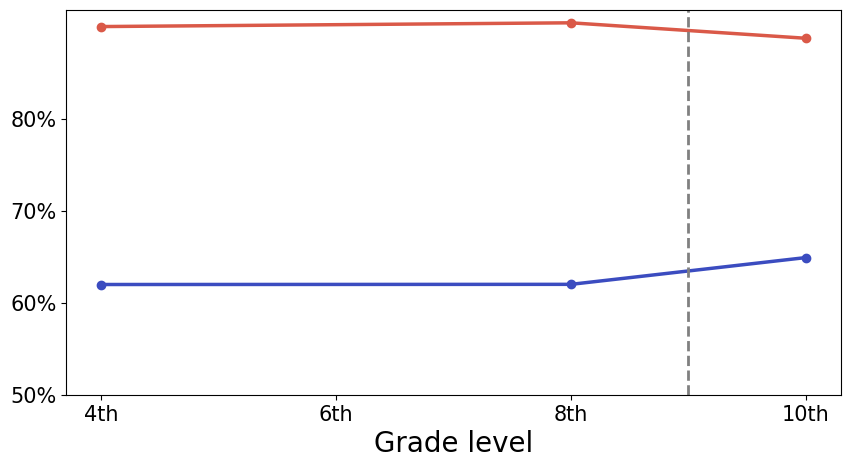

In [12]:
pe_5 = pe_full[(pe_full.n_cohorte == 5)].dropna(subset=['agno','SES_quintiles', 'GPA_quintil',
                                                            'parental_exp_college_or_more'])    


freq = pe_5.mrun.value_counts()
n_max = freq.values.max()
items = freq[freq==n_max].index # items that appear more than once
pe_5 = pe_5[pe_5['mrun'].isin(items)]


fig, ax = plt.subplots( figsize=(10, 5))
x = [4,8,10]

cursos = pe_5.curso_numeric.unique()
cursos.sort()

list_tot = []    
for c in cursos:
    print(c)
    df_c = pe_5[pe_5.curso_numeric == c]
    
    for nse in [12,3]:
        if nse == 12:
            q = 100*np.round(df_c[(df_c.SES_quintiles.isin([1,2,3]))].parental_exp_college_or_more.mean(),6)
        else:
            q = 100*np.round(df_c[(df_c.SES_quintiles.isin([4,5]))].parental_exp_college_or_more.mean(),6)
            
        list_tot += [[nse, c,q]]
        
df_tot = pd.DataFrame(list_tot, columns = ['case','curso','parental_exp'])

ax.plot(x, df_tot[df_tot.case == 12].parental_exp, 'o-', c = colores_deg(0),linewidth=2.5)
ax.plot(x, df_tot[df_tot.case == 3].parental_exp, 'o-', c = colores_deg(8),linewidth=2.5)


#ax.plot(x, df_tot[df_tot.case == 4].parental_exp, 'o-', label='Q4 income (N =' + str(len(df_c[(df_c.SES_quintiles == 4)].mrun.unique())))
#ax.plot(x, df_tot[df_tot.case == 5].parental_exp, 'o-', label='Q5 income (N =' + str(len(df_c[(df_c.SES_quintiles == 5)].mrun.unique())))
ax.axvline(curso_policy[5],ls='--', lw=2, color = 'gray', label = 'Policy enacted')
#ax.set_xticks(["4th","6th","8th","10th"])
#ax.set_yticks([50,60,70,80], fontsize = 30)

#ax.set_ylabel('Parents \nexpecting \ncollege', fontsize = 20, rotation=0)
ax.set_xlabel('Grade level', fontsize = 20)
#ax.set_ylim([25,95])
plt.xticks([4,6,8,10],['4th','6th','8th','10th'])
plt.yticks([50,60,70,80],["50%","60%","70%","80%"])
#plt.yticks([30,50,70,90],["30%","50%","70%","90%"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('DiD.png',dpi=200)
plt.show()

In [13]:
df_tot[df_tot.curso!=4]

,case,curso,parental_exp
2,12,8.0,62.0049
3,3,8.0,90.4473
4,12,10.0,64.9158
5,3,10.0,88.7660


# ¿PE cuando llegó la política (2015) según donde te pilló?

In [15]:
dict_cohorts ={ 1: {2013:8, 2015: 10},
                2: {2011:4, 2013:6, 2015:8, 2017:10},
                3: {2013:4, 2015:6, 2017:8},
                4: {2013:2, 2015:4}}

dict_tot = {}
for g in [[1,2], [4,5]]:
    pe_NSE = pe_full[pe_full.SES_quintiles.isin(g)]
    
    dict_nse = {}
    for a in range(2011,2018,2):
        print(a)
        pe_a = pe_NSE[pe_NSE.agno == a]

        values = pd.crosstab(pe_a.parental_exp_college_or_more, pe_a.curso_numeric, dropna=False, normalize='columns')
        values = values.iloc[1]
        dict_nse[a] = values.to_dict()
    
    dict_tot[g[0]] = dict_nse

2011
2013
2015
2017
2011
2013
2015
2017


Cohort:  1


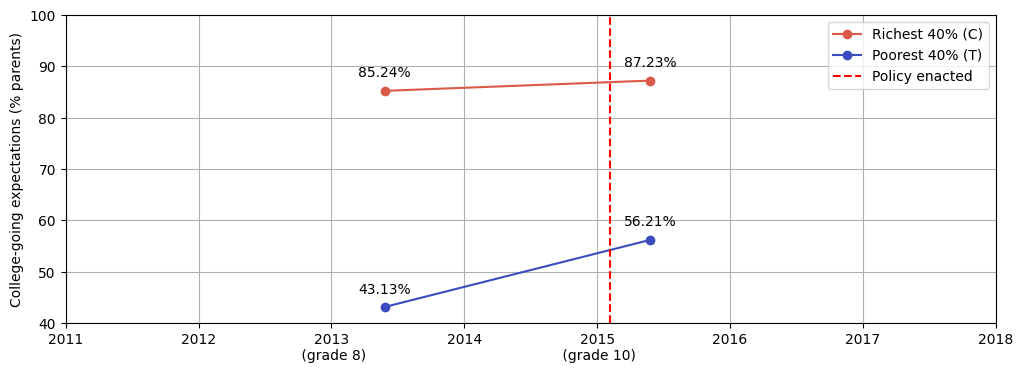

Cohort:  2


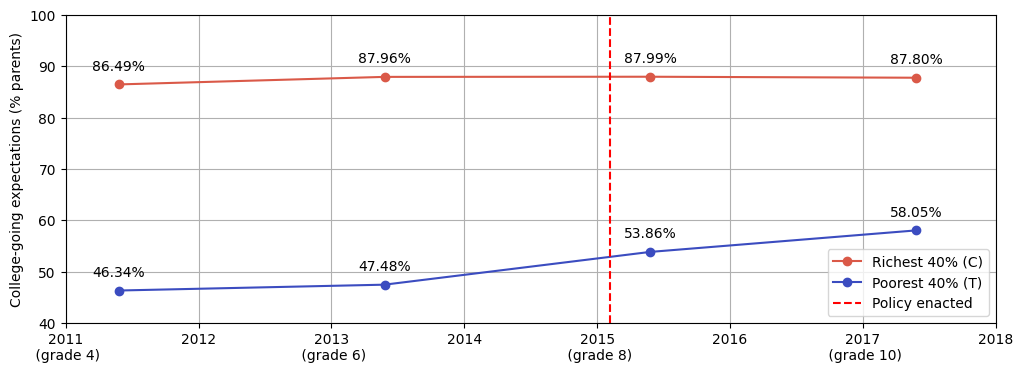

Cohort:  3


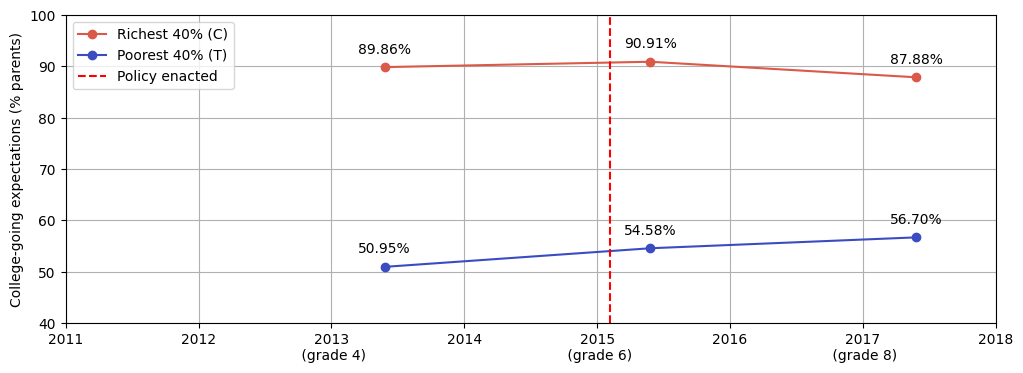

Cohort:  4


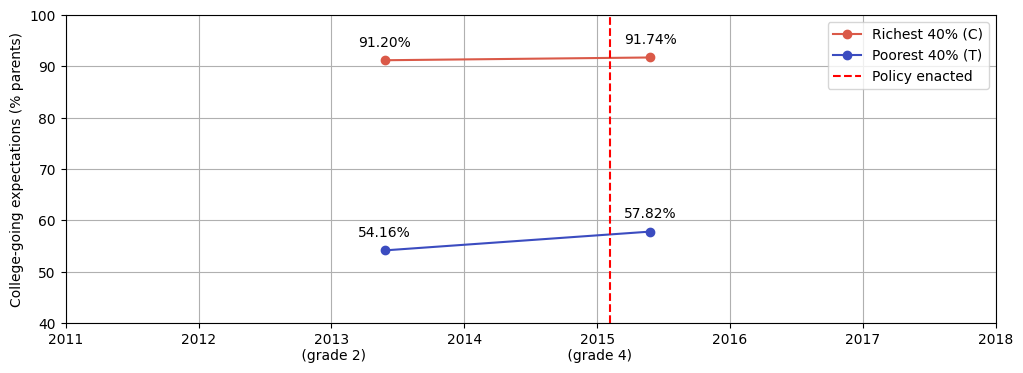

In [16]:
import matplotlib.pyplot as plt

dict_nse = {1:'Poorest 40% (T)', 4:'Richest 40% (C)'}
color_case = {1:0, 4:8}

for c in range(1, 5):
    fig, ax = plt.subplots(figsize=(12, 4))
    print('Cohort: ', c)

    for case in [4,1]:
        dict_case = dict_tot[case]

        x = []
        y = []
        for a in dict_cohorts[c].keys():
            x += [a + 0.4]
            y += [100 * dict_case[a][dict_cohorts[c][a]]]

        ax.plot(x, y, '-o', label=dict_nse[case], c=colores_deg(color_case[case]))

        # Adding number annotations to each point
        for i, (xi, yi) in enumerate(zip(x, y)):
            ax.annotate(f'{yi:.2f}%', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')

    xticks = []
    for a in range(2011, 2019):
        if a in dict_cohorts[c].keys():
            xticks += [str(a) + '\n (grade {})'.format(dict_cohorts[c][a])]
        else:
            xticks += [str(a)]

    plt.axvline(x=2015 + 0.1, ls='--', color='Red', label='Policy enacted')
    plt.ylim([40, 100])
    plt.grid(True)
    plt.legend()
    plt.xticks(range(2011, 2019), xticks)
    plt.ylabel('College-going expectations (% parents)')
    plt.show()


## Select cohort with 4 points for DiD

In [ ]:
T6 = ['2011_4b_cpad', '2013_6b_cpad', '2015_8b_cpad', '2017_2m_cpad']

dict_cohorts[2]

In [ ]:
pe_cohorte = pe_full[pe_full.n_cohorte == 6]

pd.crosstab(pe_cohorte.curso_numeric, pe_cohorte.agno)

In [ ]:
pe_cohorte.to_stata('data_cohorte_parental_exp.dta')

# Estudiantes


In [ ]:
# if a < 2017:
#     data.student_expectations.replace(1,'1.No 4to medio',inplace=True)
#     data.student_expectations.replace(2,'2.Media',inplace=True)
#     data.student_expectations.replace(3,'3.CFT/IP',inplace=True)
#     data.student_expectations.replace(4,'4.Universidad',inplace=True)
# else:
#     data.student_expectations.replace(1,'1.No 4to medio',inplace=True)
#     data.student_expectations.replace(2,'2.Media HC',inplace=True)
#     data.student_expectations.replace(3,'3.Media TP',inplace=True)
#     data.student_expectations.replace(4,'4.IP/CFT',inplace=True)
#     data.student_expectations.replace(5,'5.Universidad',inplace=True)
#     data.student_expectations.replace(6,'6.Postgrado',inplace=True)

In [ ]:
j = 0
for a in range(2009,2020):
    print('\n',a)
    for c in [8,10]:
        print(c)
        data  = se_full[(se_full.agno == a)& (se_full.curso_numeric == c)]
        
        if len(data)>0:
            
            if a < 2017:
                data.student_expectations.replace(1,'1.No 4to medio',inplace=True)
                data.student_expectations.replace(2,'2.Media',inplace=True)
                data.student_expectations.replace(3,'3.CFT/IP',inplace=True)
                data.student_expectations.replace(4,'4.Universidad',inplace=True)
            else:
                data.student_expectations.replace(1,'1.No 4to medio',inplace=True)
                data.student_expectations.replace(2,'2.Media HC',inplace=True)
                data.student_expectations.replace(3,'3.Media TP',inplace=True)
                data.student_expectations.replace(4,'4.IP/CFT',inplace=True)
                data.student_expectations.replace(5,'5.Universidad',inplace=True)
                data.student_expectations.replace(6,'6.Postgrado',inplace=True)
                
        data['student_expectations_bin'] = data.student_expectations.replace({'1.No 4to medio':0,
                                                                              '2.Media': 0,
                                                                              '3.CFT/IP':0, 
                                                                              '4.Universidad': 1,
                                                                              '2.Media HC': 0,
                                                                              '3.Media TP':0,
                                                                              '4.IP/CFT':0,
                                                                              '5.Universidad':1,
                                                                              '6.Postgrado':1})

            
        if j == 0:
            data_tot_se = data.copy()
        else:
            data_tot_se = pd.concat([data_tot_se,data])
            
        j+=1

In [ ]:
pd.crosstab(data_tot_se.agno, data_tot_se.student_expectations)

In [ ]:
data_tot_se.columns

In [ ]:
dict_cohorts ={ 1: {2011:8, 2013:10},
                2: {2013:8, 2015: 10},
                3: {2014:8, 2016:10},
                4: {2015:8, 2017:10}}

dict_tot = {}
for g in [[1,2], [4,5]]:
    se_NSE = data_tot_se[data_tot_se.SES_quintiles.isin(g)]
    
    dict_nse = {}
    for a in [2011,2013,2014,2015,2016,2017]:
        print(a)
        se_a = se_NSE[se_NSE.agno == a]

        values = pd.crosstab(se_a.student_expectations_bin, se_a.curso_numeric, dropna=False, normalize='columns')
        values = values.iloc[1]
        dict_nse[a] = values.to_dict()
    
    dict_tot[g[0]] = dict_nse

In [ ]:
import matplotlib.pyplot as plt

dict_nse = {1:'Poorest 40% (T)', 4:'Richest 40% (C)'}
color_case = {1:0, 4:8}

for c in range(1, 5):
    fig, ax = plt.subplots(figsize=(12, 4))
    print('Cohort: ', c)

    for case in [4,1]:
        dict_case = dict_tot[case]

        x = []
        y = []
        for a in dict_cohorts[c].keys():
            x += [a + 0.4]
            y += [100 * dict_case[a][dict_cohorts[c][a]]]

        ax.plot(x, y, '-o', label=dict_nse[case], c=colores_deg(color_case[case]))

        # Adding number annotations to each point
        for i, (xi, yi) in enumerate(zip(x, y)):
            ax.annotate(f'{yi:.2f}%', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')

    xticks = []
    for a in range(2011, 2019):
        if a in dict_cohorts[c].keys():
            xticks += [str(a) + '\n (grade {})'.format(dict_cohorts[c][a])]
        else:
            xticks += [str(a)]

    plt.axvline(x=2015 + 0.1, ls='--', color='Red', label='Policy enacted')
    plt.ylim([40, 100])
    plt.grid(True)
    plt.legend()
    plt.xticks(range(2011, 2019), xticks)
    plt.ylabel('College-going expectations (% students)')
    plt.show()

In [ ]:
# GPA
dict_nse = {1:'Poorest 40% (T)', 4:'Richest 40% (C)'}
color_case = {1:0, 4:8}

dict_cohorts ={ 1: {2013:8, 2015: 10},
                2: {2011:4, 2013:6, 2015:8, 2017:10},
                3: {2013:4, 2015:6, 2017:8},
                4: {2013:2, 2015:4}}

dict_tot = {}
for g in [[1,2], [4,5]]:
    pe_NSE = pe_full[pe_full.SES_quintiles.isin(g)]
    
    dict_nse = {}
    for a in range(2011,2018,2):
        print(a)
        pe_a = pe_NSE[pe_NSE.agno == a]

        values = pe_a.groupby(['curso_numeric'])['GPA_percentil'].mean()
        dict_nse[a] = values.to_dict()
    
    dict_tot[g[0]] = dict_nse

In [ ]:
dict_nse = {1:'Poorest 40% (T)', 4:'Richest 40% (C)'}
color_case = {1:0, 4:8}

for c in range(1, 5):
    fig, ax = plt.subplots(figsize=(12, 4))
    print('Cohort: ', c)

    for case in [4,1]:
        dict_case = dict_tot[case]

        x = []
        y = []
        for a in dict_cohorts[c].keys():
            x += [a + 0.8]
            y += [dict_case[a][dict_cohorts[c][a]]]

        ax.plot(x, y, '-o', label=dict_nse[case], c=colores_deg(color_case[case]))

        # Adding number annotations to each point
        for i, (xi, yi) in enumerate(zip(x, y)):
            ax.annotate(f'{yi:.2f}%', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')

    xticks = []
    for a in range(2011, 2019):
        if a in dict_cohorts[c].keys():
            xticks += [str(a) + '\n (grade {})'.format(dict_cohorts[c][a])]
        else:
            xticks += [str(a)]

    plt.axvline(x=2015 + 0.5, ls='--', color='Red', label='Policy enacted')
    #plt.ylim([40, 100])
    plt.grid(True)
    plt.legend()
    plt.xticks([x + 0.5 for x in range(2011, 2019)], xticks)
    plt.ylabel('GPA (class percentile)')
    plt.show()

# ANUAL

In [ ]:
pe_full_clean = pe_full[~pe_full.agno.isin([2007,2010])]
#pe_full_clean_4b = pe_full_clean[pe_full_clean.curso_numeric == 4]
pe_full_clean_ses_12 = pe_full_clean[pe_full_clean.SES_quintiles.isin([1,2])]


In [ ]:
from scipy import interpolate

# total
df_anual = pd.crosstab(pe_full_clean.dropna(subset=['SES_quintiles']).parental_exp_college_or_more,pe_full_clean.dropna(subset=['SES_quintiles']).agno, normalize='columns')


In [ ]:
pe_full_clean.Income_quintiles_4b_2345.value_counts(dropna=False)

In [ ]:
df_anual_SES_12 = pd.crosstab(pe_full_clean_ses_12.parental_exp_college_or_more,
                               pe_full_clean_ses_12.agno, normalize='columns')


In [ ]:
fig, ax = plt.subplots( figsize=(15, 7))
xnew = np.linspace(2002,2019, 100)

x = list(df_anual_SES_12.loc[1].index)
y_tot = list(df_anual_SES_12.loc[1].values)
#ax.plot(x,y_tot, 'o')

model_tot = np.poly1d(np.polyfit(x, y_tot, 3))
#ax.plot(xnew, model_tot(xnew), '--', label='NSE 1, 2')

for gpa in range(1,6):
    pe_full_clean_gpa = pe_full_clean_ses_12[pe_full_clean_ses_12.GPA_quintil == gpa]
    df_anual_gpa = pd.crosstab(pe_full_clean_gpa.parental_exp_college_or_more,pe_full_clean_gpa.agno, 
                                   normalize='columns')
    
    x = list(df_anual_gpa.loc[1].index)


    
    y_gpa = list(df_anual_gpa.loc[1].values)

    ax.plot(x,y_gpa, 'o')

    model_ses = np.poly1d(np.polyfit(x, y_gpa, 3))

    ax.plot( xnew, model_ses(xnew), '--', label = 'GPA ' +str(gpa))

plt.legend()
#ax.set_xticks_labels(list(range(2002, 2021)))

## Por NSE

In [ ]:
fig, ax = plt.subplots( figsize=(10, 5))
xnew = np.linspace(2002,2019, 100)

pe_full_pre = pe_full[(pe_full.agno<=2019) & (~pe_full.agno.isin([2007,2010]))]
# NSE 1 y 2
pe_full_clean_nse12 = pe_full_pre[pe_full_pre.SES_quintiles.isin([1,2])].dropna(subset=['agno','SES_quintiles', 
                                                                        'parental_exp_college_or_more'])
df_anual_12 = pd.crosstab(pe_full_clean_nse12.parental_exp_college_or_more,pe_full_clean_nse12.agno, 
                                   normalize='columns')
x = list(df_anual_12.loc[1].index)
y_nse = list(100*df_anual_12.loc[1].values)
ax.plot(x,y_nse, 'o', c = colores_deg(0))
model_ses = np.poly1d(np.polyfit(x, y_nse, 3))
ax.plot( xnew, model_ses(xnew), '--', c = colores_deg(0))

# NSE 4 y 5
pe_full_clean_nse45 = pe_full_pre[pe_full_pre.SES_quintiles.isin([4,5])].dropna(subset=['agno','SES_quintiles', 
                                                                        'parental_exp_college_or_more'])
df_anual_45 = pd.crosstab(pe_full_clean_nse45.parental_exp_college_or_more,pe_full_clean_nse45.agno, 
                                   normalize='columns')
x = list(df_anual_45.loc[1].index)
y_nse = list(100*df_anual_45.loc[1].values)
ax.plot(x,y_nse, 'o', c = colores_deg(8))
model_ses = np.poly1d(np.polyfit(x, y_nse, 3))
ax.plot( xnew, model_ses(xnew), '--', c = colores_deg(8))

ax.axvline(2016,ls='--', lw=2, color = 'gray', label = 'Policy enacted')


#ax.set_ylim([50,80])
plt.xticks([2002,2006,2011,2015,2019],['2002','2006','2011','2015','2019'])
plt.yticks([30,50,70,90],["30%","50%","70%","90%"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('trend.png',dpi=200)

plt.show()

# Test changes in expectations 

T6 = ['2011_4b_cpad', '2013_6b_cpad', '2015_8b_cpad', '2017_2m_cpad']


In [ ]:
df_t6 = pe_full[pe_full.n_cohorte==6][['agno','mrun','parental_exp_college_or_more']].dropna()


In [ ]:
df_wide = pd.pivot(df_t6, index= 'mrun', columns='agno', values='parental_exp_college_or_more').dropna()

In [ ]:
df_wide['diff1'] = df_wide[2013] > df_wide[2011]
df_wide['diff2'] = df_wide[2015] > df_wide[2013]
df_wide['diff3'] = df_wide[2017] > df_wide[2015]

In [ ]:
df_wide = pd.merge(df_wide, pe_full[['mrun','Income_quintiles_4b_2345']].drop_duplicates(subset=['mrun']),
                   on = ['mrun'],how='left')

In [ ]:
for c in ['diff1', 'diff2','diff3']:
    print(pd.crosstab(df_wide.Income_quintiles_4b_2345,df_wide[c], normalize='index'))

# Cross section

In [ ]:
pe_full.to_stata(r'data_full_parental_exp.dta')

In [ ]:
# expectations
for c in [2,4,6,8,10]:
    print(c)
    pe_4b = pe_full[pe_full.curso_numeric == c]

    np.round(100*pd.crosstab(pe_4b.SES_quintiles, pe_4b.agno, normalize = 'columns'),2)

    pe_4b_grouped = pe_4b[pe_4b.GPA_quintil.isin([1,2,3,4,5])][['agno', 'SES_quintiles', 'parental_exp_college_or_more']].groupby(['agno','SES_quintiles'], as_index=False).mean()

    df_wide = pe_4b_grouped.pivot(index='SES_quintiles', columns='agno', values='parental_exp_college_or_more')

    fig, ax = plt.subplots(figsize = (10,5))
    for i in range(1,6):
        df_wide.loc[i].plot(marker = 'o')

    plt.grid(True)
    plt.show()

In [ ]:
# GPA
for c in [2,4,6,8,10]:
    print(c)
    pe_4b = pe_full[pe_full.curso_numeric == c]

    pe_4b_grouped = pe_4b[pe_4b.GPA_quintil.isin([1,2,3,4,5])][['agno', 'SES_quintiles', 'GPA_percentil']].groupby(['agno','SES_quintiles'], as_index=False).mean()

    df_wide = pe_4b_grouped.pivot(index='SES_quintiles', columns='agno', values='GPA_percentil')

    fig, ax = plt.subplots(figsize = (10,5))
    for i in range(1,6):
        df_wide.loc[i].plot(marker = 'o')

    plt.grid(True)
    plt.show()